<a href="https://colab.research.google.com/github/Shankar-Hadimani/ai-ml-engineering/blob/master/notebook/03_sentiment_anlaysis_AutoNLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
### install automl for NLP
!pip install autoviml

In [68]:
# set up libraries
import tensorflow_datasets as tfds
import numpy as np
import pandas as pd


In [69]:
dataset, info = tfds.load('amazon_us_reviews/Personal_Care_Appliances_v1_00', with_info=True, batch_size=-1)
train_dataset = dataset['train']

In [70]:
info

tfds.core.DatasetInfo(
    name='amazon_us_reviews',
    version=0.1.0,
    description='Amazon Customer Reviews (a.k.a. Product Reviews) is one of Amazons iconic products. In a period of over two decades since the first review in 1995, millions of Amazon customers have contributed over a hundred million reviews to express opinions and describe their experiences regarding products on the Amazon.com website. This makes Amazon Customer Reviews a rich source of information for academic researchers in the fields of Natural Language Processing (NLP), Information Retrieval (IR), and Machine Learning (ML), amongst others. Accordingly, we are releasing this data to further research in multiple disciplines related to understanding customer product experiences. Specifically, this dataset was constructed to represent a sample of customer evaluations and opinions, variation in the perception of a product across geographical regions, and promotional intent or bias in reviews.

Over 130+ million cus

In [71]:
### convert tensor to numpy array
dataset = tfds.as_numpy(train_dataset)

In [72]:
dataset

{'data': {'customer_id': array([b'13986323', b'50574716', b'50593972', ..., b'40719682',
         b'35596948', b'29430209'], dtype=object),
  'helpful_votes': array([0, 3, 0, ..., 0, 0, 0], dtype=int32),
  'marketplace': array([b'US', b'US', b'US', ..., b'US', b'US', b'US'], dtype=object),
  'product_category': array([b'Personal_Care_Appliances', b'Personal_Care_Appliances',
         b'Personal_Care_Appliances', ..., b'Personal_Care_Appliances',
         b'Personal_Care_Appliances', b'Personal_Care_Appliances'],
        dtype=object),
  'product_id': array([b'B00847JQZ6', b'B00N5HD340', b'B0077L1X24', ..., b'B000UZ8X2W',
         b'B000NURPPK', b'B001EY5GNW'], dtype=object),
  'product_parent': array([b'997683625', b'955577225', b'120764066', ..., b'96066145',
         b'58591097', b'986877728'], dtype=object),
  'product_title': array([b'SE - Reading Glass - Spring Loaded Hinges, 4.0x - RTS62400',
         b'Straight Razor',
         b'Philips Sonicare Flexcare & Healthy White Plastic

In [73]:
### extract required fields from the dataset
helpful_votes = dataset['data']['helpful_votes']
review_headline = dataset['data']['review_headline']
review_body = dataset['data']['review_body']
rating = dataset['data']['star_rating']

In [74]:
### convert above features to a pandas dataframe
reviews_df = pd.DataFrame(np.hstack((helpful_votes[:,None],review_headline[:,None],review_body[:,None],rating[:,None])),
                      columns=['votes','headline','reviews','rating']
                      )

## Define schema 
schema_dict = {'votes': int, 'headline':str, 'reviews':str, 'rating':int }

In [88]:
### apply schema onto pandas dataframe
reviews_df = reviews_df.astype(schema_dict)

#reviews_df

,votes,headline,reviews,rating,target
0,0,b'These glasses are an excellent value. The fit is good and they are ...',"b""These glasses are an excellent value. The fit is good and they are very comfortable. Because of my legal blindness, there aren't a lot of options to try to see better, but I believe these help with my other visual aids, and because they are reasonably priced I can have more than one pair available.""",4,1
1,3,b'A fantastic way to cheaply try straight razor shaving.',"b""Always wanted to try straight razor shaving (as a DE safety razor user), and this was a cheap way for me to determine I was not into it.<br /><br />Because the blades are disposable and always sharp, I could put a new one in and reasonably rely upon that fact that cuts were probably due to my technique and not the blade.<br /><br />It's very hard to do straight razor shaving on yourself because the ANGLE is difficult to control without switching hands. Being very right-handed, I really couldn't do that. I bet I could shave someone else's face with it though.<br /><br />An immediate upside? Using a DE safety razor (slant edged even) seems SUPER safe now! I'm increased my speed with the DE due to that confidence, and I'd been using it for years now.""",5,1
2,0,b'Great for travel',"b'I usually either throw my toothbrush in a plastic bag with spare head so this product is very convenient for keeping all the parts apart, dry and undamaged, and i now keep it in my travel bag all the time ready to go.'",4,1
3,0,b'Five Stars',b'Top quality.',5,1
4,1,b'*Product sent not as shown',"b'Today I received 1 Fl. Oz, Natures Balance AlkaMAX alkaline booster liquid unflavored (formally TriMedica) a glass brown bottle with eye dropper.<br />Supplement Facts; Serving Size: 10 Drops (Approx. 0.5 mL). Servings per Container: Approx. 60<br />Amount Per Serving % Daily Value<br />Magnesium (as Magnesium Chloride) 40 mg 10%<br />Chloride (as Magnesium Chloride) 64 mg 2%<br />Other Ingredients: Deionized water and trace mineral complex.<br />Directions: Add 10 drops to 8 oz. of water or other beverage daily as needed or as directed by your health care practitioner. Store in a cool, dry place.<br /><br />I have not used product as of yet with changed ingredients of original/as shown in AlkaMax alkaline support white squeeze bottle.<br />but had to rate to post...heck this new may be better for all I know.'",3,0
...,...,...,...,...,...
85976,2,b'YES!',"b""This is the real deal. Don't bother with the $20-30 hair cutters and the junky plastic attachments. But the professional Oster and the attachments you need. You'll still save a fortune over pro haircuts, but the cheap models don't work nearly as neatly or quickly.""",5,1
85977,1,b'Bryton Picks',b'I like the Bryton Picks very much. Have ordered these unusual picks before and will again when the need arises. They work amazingly well.',5,1
85978,0,b'Trimmer Not Working',"b""I have had a Remington before but needed a new one when the batteries died and the cutters were all but gone. It was cheaper to buy a new one. The new one has a nice charge level but the trimmer didn't work when I got it.""",3,0
85979,0,b'Loud and ineffectual',"b""I was surprised that it really didn't do much compared to the 1950s version that I'd inherited. Keeping a wet wash cloth next to my bed for when I start coughing in the middle of the night works better.""",2,0


In [76]:
### create an additonal feature as 'target', if rarting is greater or equal to 4
reviews_df['target'] = reviews_df['rating'].apply(lambda x: 1 if x >= 4 else 0)

In [77]:
# reviews_df
review_df.shape

(85981, 4)

In [89]:
### view rarting distribution. 
### Seems like imbalanced dataset ( rating distributed)  
reviews_df["target"].value_counts()

1    62554
0    23427
Name: target, dtype: int64

In [90]:
### verufy the schema assigne
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85981 entries, 0 to 85980
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   votes     85981 non-null  int64 
 1   headline  85981 non-null  object
 2   reviews   85981 non-null  object
 3   rating    85981 non-null  int64 
 4   target    85981 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 3.3+ MB


In [91]:
### import scikit learn libraries and split dataset
from sklearn.model_selection import train_test_split

In [92]:
train_ds, test_ds = train_test_split(review_df, test_size=0.25)

In [93]:
### import AutoNLP 
from autoviml.Auto_NLP import Auto_NLP

In [95]:
nlp_column = 'reviews'
target = "target"

In [94]:
# print(nlp_column_name)
# print(target_column_name)

reviews
target


Auto NLP processing on NLP Column: reviews
Shape of Train Data: 64485 rows
    Shape of Test Data: 21496 rows
    Added 9 summary columns for counts of words and characters in each row
Cleaning text in Train data for reviews column
    Faster text processing using clean_text function, since top_num_features is below 300
    Time Taken for Expanding emojis and abbreviations in data = 0 seconds
        Time Taken for Processing text in data = 40 seconds
Train data Text cleaning completed. Time taken = 55 seconds

For target = target


KeyError: ignored

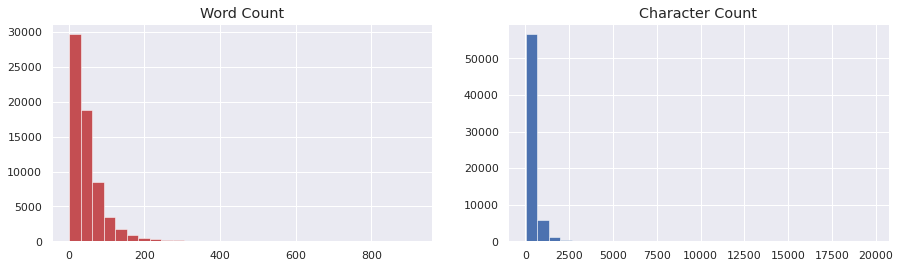

In [97]:
train_nlp, test_nlp, nlp_transformer, preds = Auto_NLP(nlp_column,
                                                       train_ds,
                                                       test_ds, 
                                                       target, 
                                                       score_type='balanced_accuracy',
                                                       modeltype='Classification', 
                                                       top_num_features=100, 
                                                       verbose=1,
                                                       build_model=True)

In [99]:
nlp_transformer

NameError: ignored

In [ ]:
nlp_transformer.predict(test['nlp_column'])